In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import datetime
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
#%load_ext rpy2.ipython
import plotnine as pln
from collections.abc import Mapping


from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

import warnings
warnings.filterwarnings('ignore', 'invalid value encountered in greater', RuntimeWarning)
warnings.filterwarnings('ignore', 'invalid value encountered in true_divide', RuntimeWarning)
warnings.filterwarnings('ignore', 'divide by zero encountered in true_divide', RuntimeWarning)


In [62]:
#surface meteo data
sdata=pd.read_csv("./data/data_baoshan/SurfaceData58362.csv",
                  sep=',',na_values=["/////","///","////","//////",999999],encoding='GB2312')
sdata['DATETIME']=pd.to_datetime(sdata['DATETIME'],format='%Y-%m-%d %H:%M')
sdata=sdata.rename(columns={'DATETIME':'date'})

In [63]:
data=pd.read_csv("./data/data_baoshan/profiledata.csv",sep=',',na_values=["/////","///","////","//////"],low_memory=False)
data['wd']=data['wd'].replace('C','0')
data['wd'] = pd.to_numeric(data['wd'])
data=data[data['qcqa']==1].copy()
data = data.drop(columns='Unnamed: 0', axis=1)
data['date'].dropna()
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M')
data = data.sort_values(by=['date', 'height'])
data['potential_temperature']=data['temperature']+9.8*data['height']/1000


In [65]:
# Excluding rainy days
data=data[data['date'].isin(sdata['date'][sdata['PRE']<0.1])].copy()


# 08时季节的风温廓线变化 剔除雨日

In [66]:
#数据处理
season_data=data.set_index('date')
season_data=season_data[season_data.index.hour==7]
season_data.dropna(subset=['ws'],inplace=True)
season_data=season_data[['ws', 'temperature']].groupby(season_data['height']).resample('M',kind='period',axis=0).mean()
season_data=season_data.reset_index('height')
season_data.loc[season_data.index.month.isin([3,4,5]),'season']="Spring"
season_data.loc[season_data.index.month.isin([6,7,8]),'season']="Summer"
season_data.loc[season_data.index.month.isin([9,10,11]),'season']="Fall"
season_data.loc[season_data.index.month.isin([1,2,12]),'season']="Winter"
season_data=season_data.reset_index('date')
season_data=season_data.groupby(['height','season']).agg({'ws':'mean','temperature':'mean'})
season_data=season_data.sort_values(by=['season','height'])
# season_data['year']=season_data.index.year
season_data=season_data.reset_index()

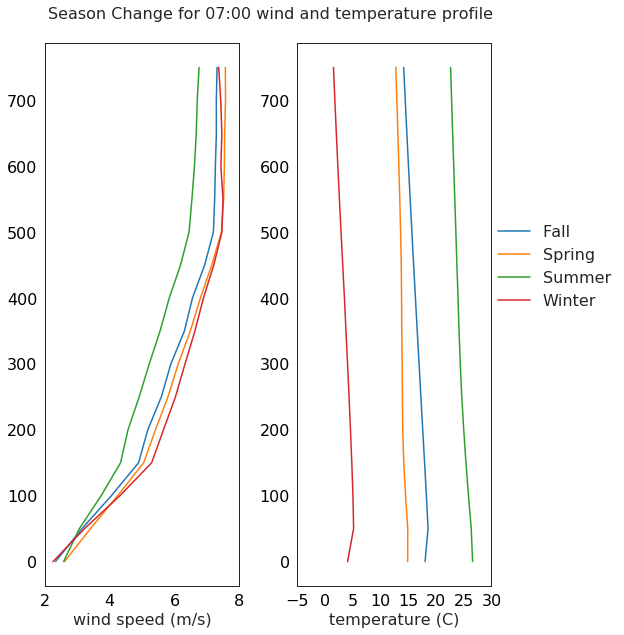

In [67]:
fig, ax = plt.subplots(1,2)
for key, grp in season_data[season_data['height']<800].groupby(['season']):
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,8)
ax[0].set_xticks([2,4,6,8])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in season_data[season_data['height']<800].groupby(['season']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([-5,0,5,10,15,20,25,30])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('Season Change for 07:00 wind and temperature profile ',fontsize=16,x=0.52,y=0.93,)
plt.show()

In [68]:
# #R作图
# # season_data=pd.melt(season_data,id_vars=['date','height','season','year'], value_vars=['ws', 'temperature','humidity'])
# #season_data['year']=season_data['year'].astype('category')
# %R -i season_data


    

In [69]:
# %%R 
# library(ggplot2)
# ggplot(season_data[which(season_data$height<600),],aes(x=temperature,y=height,color=factor(season)))+geom_path()+theme_bw()


# 20时四个季节的风温廓线

In [70]:
#数据处理
season_data=data.set_index('date')
season_data=season_data[season_data.index.hour==19]
season_data.dropna(subset=['ws'],inplace=True)
season_data=season_data[['ws', 'temperature']].groupby(season_data['height']).resample('M',kind='period',axis=0).mean()
season_data=season_data.reset_index('height')
season_data.loc[season_data.index.month.isin([3,4,5]),'season']="Spring"
season_data.loc[season_data.index.month.isin([6,7,8]),'season']="Summer"
season_data.loc[season_data.index.month.isin([9,10,11]),'season']="Fall"
season_data.loc[season_data.index.month.isin([1,2,12]),'season']="Winter"
season_data=season_data.reset_index('date')
season_data=season_data.groupby(['height','season']).agg({'ws':'mean','temperature':'mean'})
season_data=season_data.sort_values(by=['season','height'])
# season_data['year']=season_data.index.year
season_data=season_data.reset_index()

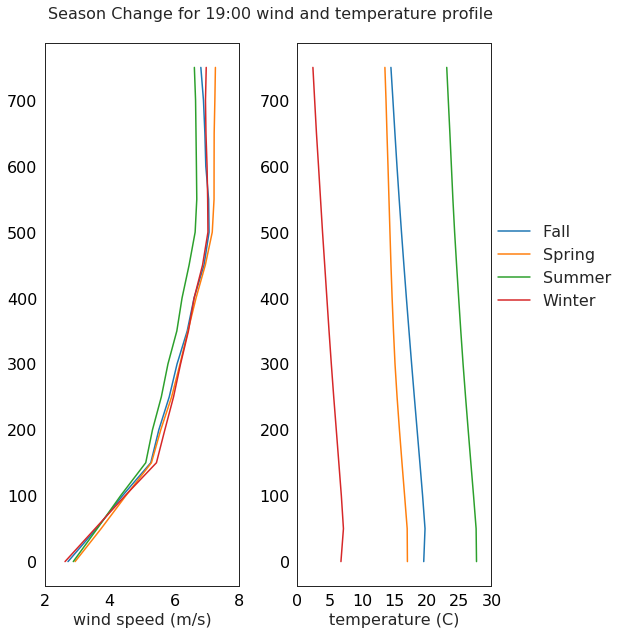

In [71]:
fig, ax = plt.subplots(1,2)
for key, grp in season_data[season_data['height']<800].groupby(['season']):
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,8)
ax[0].set_xticks([2,4,6,8])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in season_data[season_data['height']<800].groupby(['season']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('Season Change for 19:00 wind and temperature profile ',fontsize=16,x=0.52,y=0.93,)
plt.show()

#  利用kahl的方法来获取逆温相关数据。

Beginning at the surface, each temperature profile is scanned upward to locate the first layer in which the temperature increases with altitude. The bottom of this layer identifies the inversion base. The inversion top is defined as the bottom of the first subsequent layer in which the temperature decreases with altitude. Thin negative-lapse layers (<100 m) are ignored if they are embedded within a deeper inversion layer.


Reference: Kahl, J. D. (1990). Characteristics of the low-level temperature inversion along the Alaskan Arctic coast. International Journal of Climatology, 10, 237–548.

数据为宝山探空数据，时间为2013年1月1日-2020年2月10日

In [72]:
# import inv_finder
# params=inv_finder.default_params()
# invdata=inv_finder.kahl_inversions(data,params)
# invdata.to_csv('invtemperature.csv')
invdata=pd.read_csv('./data/invtemperature.csv')
invdata['date']=pd.to_datetime(invdata['date'],format='%Y-%m-%d %H:%M')

# 分析探空数据


## 逆温频率, 逆温底高, 逆温厚度, 逆温强度

In [73]:
t=pd.DataFrame(data.drop_duplicates(['date'])['date']) #获取观测次数
invdata['inv_strength']=(invdata['dT']/invdata['dZ'])*100 #计算逆温强度 单位：C/100m
t=pd.merge(t,invdata,on='date',how='outer')
t=t.set_index('date')
t=t[(t.index.hour==7)|(t.index.hour==19)]
t.loc[:,'hour']=t.index.hour
t.loc[t.index.month.isin([3,4,5]),'season']="spring"
t.loc[t.index.month.isin([6,7,8]),'season']="summer"
t.loc[t.index.month.isin([9,10,11]),'season']="autumn"
t.loc[t.index.month.isin([1,2,12]),'season']="winter"
t['invtemp_flag']=False
t.loc[t['bh']<500,'invtemp_flag']=True


### 表1.逆温统计表（单位：摄氏度）

dZ: 逆温层厚度为逆温层的顶部高度-逆温层的起始高度；米

dT: 逆温层的上部温度-下部温度；摄氏度

inv_strength: 逆温差dT与逆温厚度dZ的商；摄氏度每百米

bh: 逆温层的起始高度，本数据统计限制起始高度500m以内；米




In [74]:
t[t['invtemp_flag']==True].groupby(['season','hour']).agg({'dT':'mean','bh':'mean','dZ':'mean','inv_strength':'mean'})

dT          bh          dZ  inv_strength
season hour                                                
autumn 7     1.549511   52.605863   83.876221      1.869966
       19    0.688298   31.382979   56.028369      1.145106
spring 7     1.805028  165.502793  137.150838      1.262148
       19    1.152597  162.824675  106.006494      1.015044
summer 7     0.801111  212.777778   97.962963      0.778987
       19    0.567556  106.888889   76.222222      0.687733
winter 7     2.670755   35.691824  117.610063      2.338047
       19    1.318491   48.867925   73.207547      1.742260

## 表2.逆温发生频率

发生逆温的天数与观测总天数的比
数据时间段：2013年1月1日-2020年2月10

In [75]:
pd.crosstab([t.season,t.hour],t.invtemp_flag,normalize='index')

invtemp_flag     False     True 
season hour                     
autumn 7      0.449821  0.550179
       19     0.504394  0.495606
spring 7      0.327068  0.672932
       19     0.441016  0.558984
summer 7      0.518717  0.481283
       19     0.602473  0.397527
winter 7      0.375246  0.624754
       19     0.489403  0.510597

# 秋冬季08时和20时风温廓线的年变化 
地面风速小于3m/s，剔除雨日

In [76]:
A_season=data[data['date'].isin(sdata['date'][sdata['WSP']<3])].copy()
A_season=data.set_index('date')
A_season=A_season[A_season.index.hour==7]
A_season=A_season[['ws','temperature']].groupby(A_season['height']).resample('Q-Feb',kind='period',axis=0).mean()
A_season=A_season.reset_index('height')
A_season=A_season[A_season.index.month.isin([2,11])]
A_season=A_season.sort_values(by=['date','height'])
# A_season.loc[A_season.index.month==5,'season']='Spring'
# A_season.loc[A_season.index.month==8,'season']='Summer'
A_season.loc[A_season.index.month==11,'season']='Fall'
A_season.loc[A_season.index.month==2,'season']='Winter'
A_season['year']=A_season.index.year
A_season=A_season.reset_index()




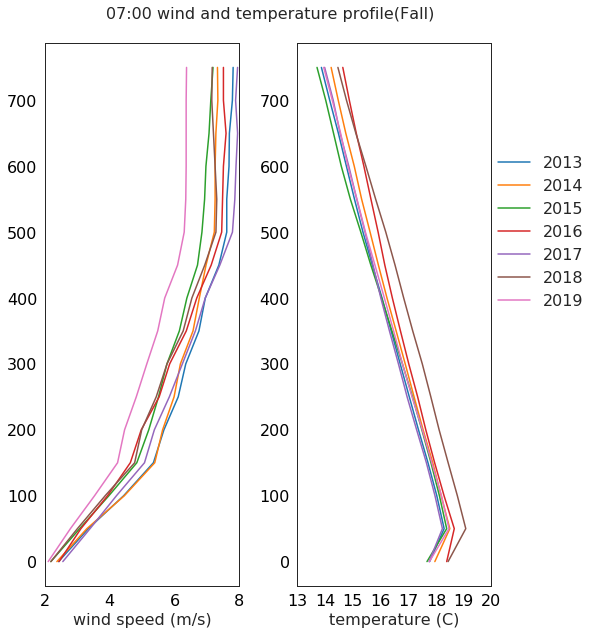

In [77]:
fig, ax = plt.subplots(1,2)
for key, grp in A_season[(A_season['height']<800) & (A_season['season']=="Fall")].groupby(A_season['year']):
    
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,8)
ax[0].set_xticks([2,4,6,8])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in A_season[(A_season['height']<800 )& (A_season['season']=='Fall')].groupby(A_season['year']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([13,14,15,16,17,18,19,20])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('07:00 wind and temperature profile(Fall) ',fontsize=16,x=0.52,y=0.93,)
plt.show()

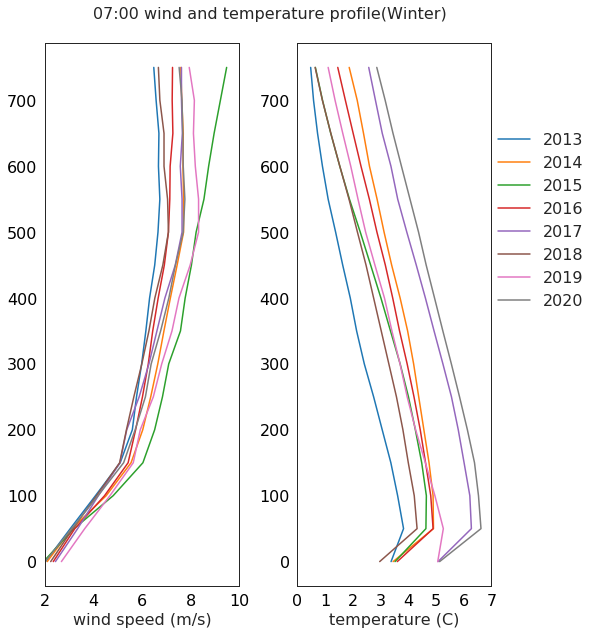

In [78]:
fig, ax = plt.subplots(1,2)
for key, grp in A_season[(A_season['height']<800) & (A_season['season']=="Winter")].groupby(A_season['year']):
    
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,10)
ax[0].set_xticks([2,4,6,8,10])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in A_season[(A_season['height']<800 )& (A_season['season']=='Winter')].groupby(A_season['year']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([0,1,2,3,4,5,6,7])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('07:00 wind and temperature profile(Winter) ',fontsize=16,x=0.52,y=0.93,)
plt.show()

In [79]:
A_season=data[data['date'].isin(sdata['date'][sdata['WSP']<3])].copy()
A_season=data.set_index('date')
A_season=A_season[A_season.index.hour==19]
A_season=A_season[['ws','temperature']].groupby(A_season['height']).resample('Q-Feb',kind='period',axis=0).mean()
A_season=A_season.reset_index('height')
A_season=A_season[A_season.index.month.isin([2,11])]
A_season=A_season.sort_values(by=['date','height'])
# A_season.loc[A_season.index.month==5,'season']='Spring'
# A_season.loc[A_season.index.month==8,'season']='Summer'
A_season.loc[A_season.index.month==11,'season']='Fall'
A_season.loc[A_season.index.month==2,'season']='Winter'
A_season['year']=A_season.index.year
A_season=A_season.reset_index()

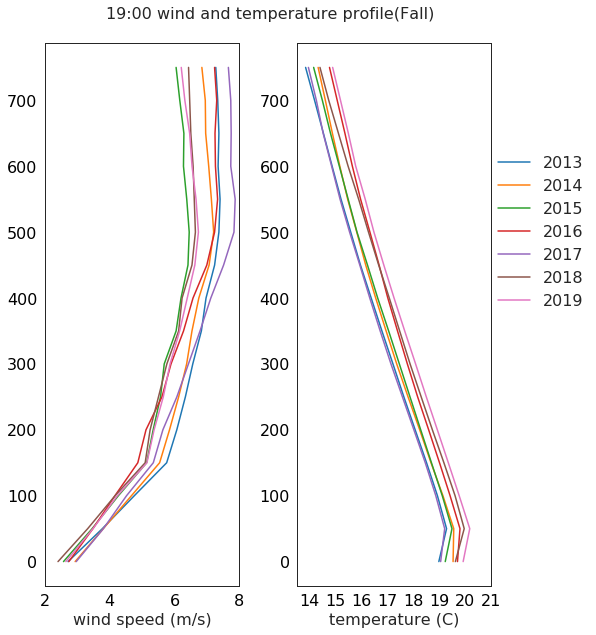

In [80]:
fig, ax = plt.subplots(1,2)
for key, grp in A_season[(A_season['height']<800) & (A_season['season']=="Fall")].groupby(A_season['year']):
    
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,8)
ax[0].set_xticks([2,4,6,8])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in A_season[(A_season['height']<800 )& (A_season['season']=='Fall')].groupby(A_season['year']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([14,15,16,17,18,19,20,21])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('19:00 wind and temperature profile(Fall) ',fontsize=16,x=0.52,y=0.93,)
plt.show()

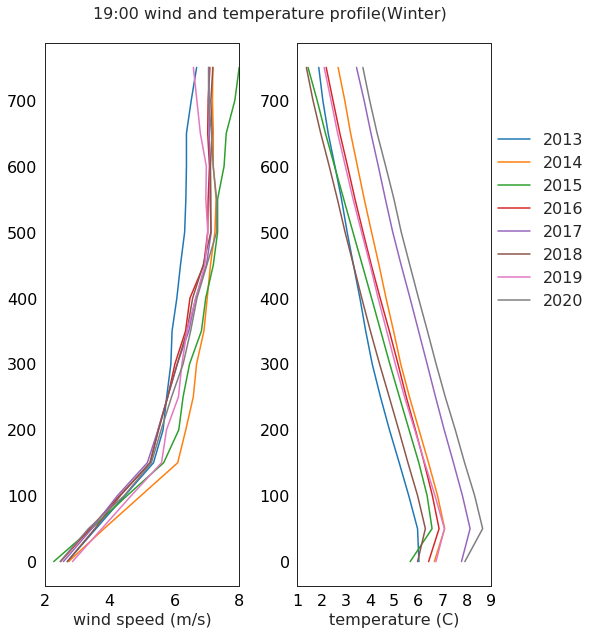

In [81]:
fig, ax = plt.subplots(1,2)
for key, grp in A_season[(A_season['height']<800) & (A_season['season']=="Winter")].groupby(A_season['year']):
    
    ax[0] = grp.plot(ax=ax[0], kind='line', x='ws', y='height', label=key,figsize=[8,10],legend=False)
ax[0].set_xlim(2,8)
ax[0].set_xticks([2,4,6,8])
ax[0].set_xlabel('wind speed (m/s)')
ax[0].tick_params(which='major',width=2,colors='black',length=4)
for key, grp in A_season[(A_season['height']<800 )& (A_season['season']=='Winter')].groupby(A_season['year']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='temperature', y='height', label=key,figsize=[8,10])
plt.subplots_adjust(wspace=0.3,hspace=0.3)
ax[1].set_xticks([1,2,3,4,5,6,7,8,9])
ax[1].set_xlabel('temperature (C)')
ax[1].tick_params(which='major',width=2,colors='black',length=4)
plt.legend( loc = [1,0.5])
fig.suptitle('19:00 wind and temperature profile(Winter) ',fontsize=16,x=0.52,y=0.93,)
plt.show()

# PBLH的年变化

# 秋冬季不同PM2.5等级下的风温廓线 风速小于3m/s
2013 2015 2017 2019

In [120]:
#装载宝山pm数据
pmdata=pd.read_csv('./data/data_baoshan/PMData58362.csv')
#pmdata=pmdata[pmdata['DeviceType']==2].copy() #PM2.5 data 
pmdata['DateTime']=pd.to_datetime(pmdata['DateTime'],format='%Y-%m-%d %H:%M:%S')
pmdata=pmdata.set_index('DateTime')


In [ ]:
pmdata=pmdata.resample('H',axis=0).agg({'DustMassCon':'mean'})
pmdata.loc[pmdata['DustMassCon'].values<75,'pollutionlevel']='excellent'
pmdata.loc[(pmdata['DustMassCon'].values>=75)&(pmdata['DustMassCon'].values<115),'pollutionlevel']='good'
pmdata.loc[(pmdata['DustMassCon'].values>=115)&(pmdata['DustMassCon'].values<150),'pollutionlevel']='light'
pmdata.loc[pmdata['DustMassCon'].values>=150,'pollutionlevel']='heavy'
pmdata=pmdata['pollutionlevel'].resample('M',axis=0).agg({'DustMassCon':'mean'})
pmdata

In [123]:
pmdata.loc(pd.is)
pd.crosstab([pmdata.index.date,pmdata.index.hour],pmdata.DustMassCon,normalize='index')


MemoryError: Unable to allocate 2.05 GiB for an array with shape (2200519884,) and data type bool